In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Trabalho Prático 2 de Introdução a Bancos de Dados
#### Grupo:

Caio Alves Caldera (2017068734)

Helena Pato Magalhães (2017095723)

Lecio Charlles Barbosa Alves (2016065120)

Nathan Nogeira Souza (2017086023)

Túlio Dias Altíssimo (2017014375)

## Descrição dos dados
O conjunto de dados utilizado foram dados sobre Licitações, referentes ao mês de janeiro de 2020, extraídos do Data Warehouse do Sistema Integrado de Administração de Serviços Gerais (DW-SIASG) e publicados no Portal da Transparência do Governo Federal. A descrição está disponível no link:

https://dados.gov.br/dataset/licitacoes-e-contratos-do-governo-federal

E o download dos dados no link:

http://transparencia.gov.br/download-de-dados/licitacoes

### Formato original dos dados

Originalmente os dados se encontram distribuídos em três tabelas, de extensão .csv, no seguinte formato:

**Licitação**(Número Licitação, Número Processo, Objeto, Modalidade Compra, Situação Licitação, Código Órgão Superior, Nome Órgão Superior 	Código Órgão, Nome Órgão, Código UG, Nome UG, Município, Data Resultado Compra, Data Abertura, Valor Licitação)

**ItensLicitação**(Número Licitação, Número Processo, Código Órgão, Nome Órgão, Código UG, Nome UG, CNPJ Vencedor, Nome Vencedor, Descrição, Quantidade Item, Valor Item)

**ParticipantesLicitação**(Número Licitação, Número Processo, Código Órgão, Nome Órgão, Código UG, Nome UG, Código Item Compra, Descrição Item Compra, CNPJ Participante, Nome Participante)

## Diagrama Entidade Relacionamento

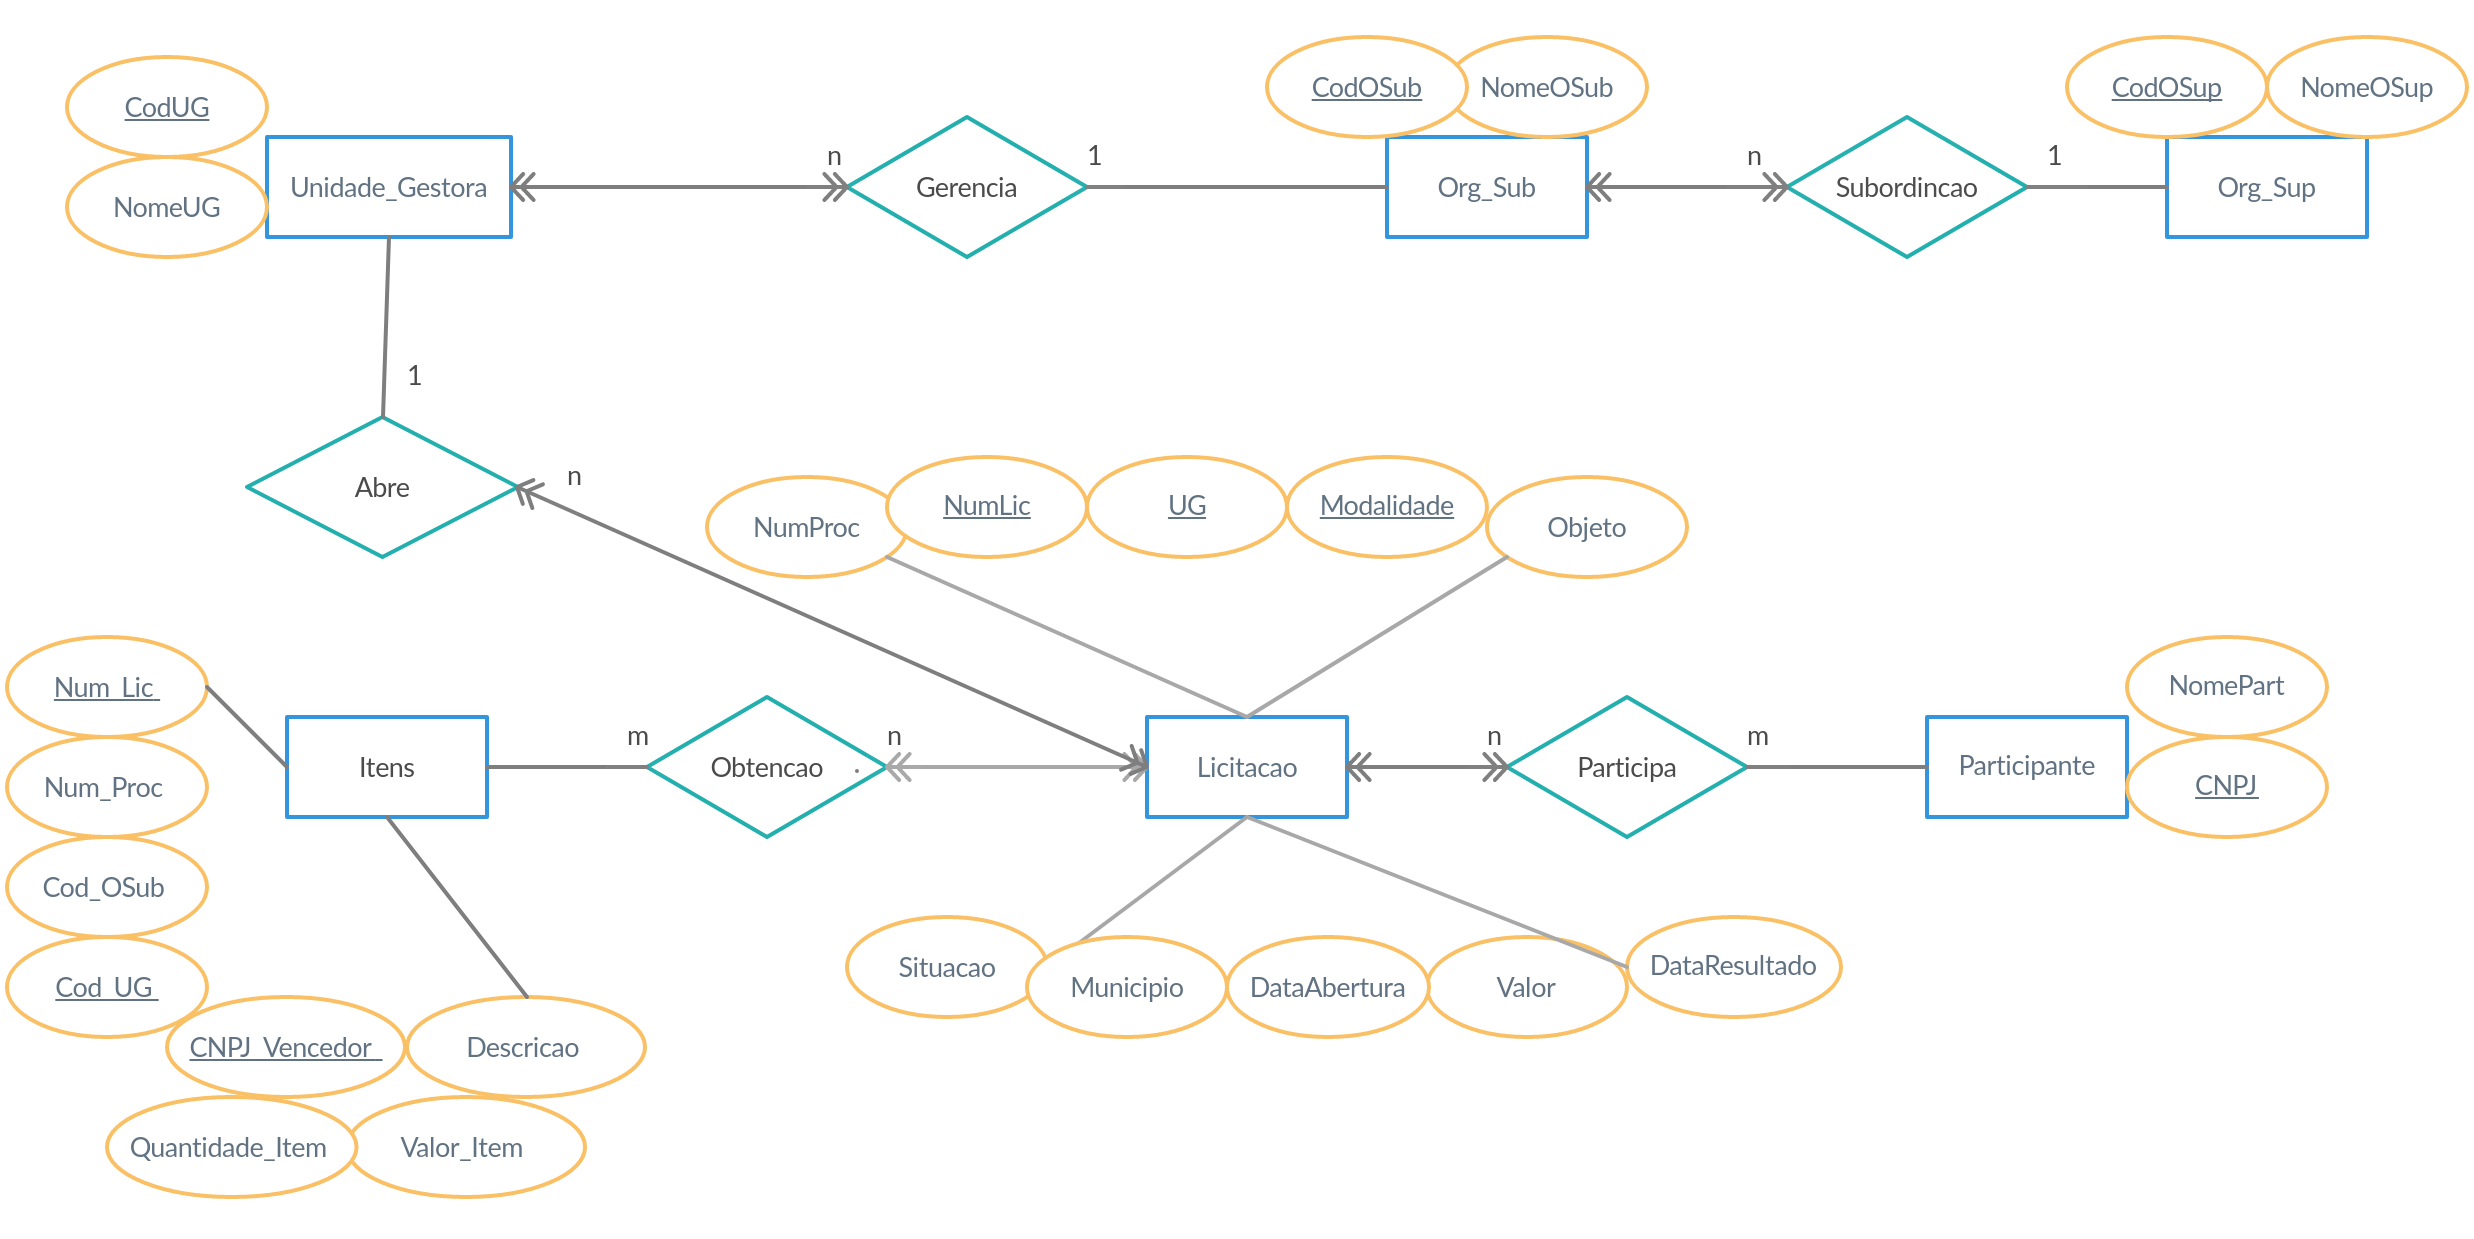

## Esquema Relacional

**Licitacao**(Num_Lic, Num_Proc, Objeto, Modalidade_Compra,  Sit__Licitacao, Cod_UG, Municipio, Data_Resultado, Data_Abertura, Valor_Licitacao)

$\qquad$ Licitação.Cod_UG referencia Unidade_Gestora.Cod_UG

**Orgao_Sup**(<ins>Cod_OSup</ins>, Nome_OSup)

**Orgao_Sub**(<ins>Cod_OSub</ins>, Nome_OSub, Cod_OSup)

$\qquad$ Org_Sub.Cod_OSup referencia Org_Sup.Cod_OSup

**Unidade_Gestora**(<ins>Cod_UG</ins>, Nome_UG, Cod_OSub)

$\qquad$ Unidade_gestora.Cod_OSub referencia Org_Sub.Cod_OSub

**Participantes**(<ins>CNPJ_Participante</ins>, Nome_Participante )

**Participantes_Licitacao**(Num_Lic, Num_Proc, Cod_Item_Compra, Desc_Item_Compra, CNPJ_Participante, Flag_Vencedor)

$\qquad$ Participantes_Licitacao.Num_Lic referencia Licitacao.Num_Lic

$\qquad$ Participantes_Licitacao.Num_Proc referencia Licitacao.Num_Proc

$\qquad$ Participantes_Licitacao.CNPJ_Participante referencia Participantes.CNPJ_Participante

**Item_Licitacao**(Num_Lic, Num_Proc, Cod_UG,  CNPJ_Vencedor, Descricao, Quantidade_Item, Valor_Item)

$\qquad$ Item_Licitacao.Num_Lic referencia Licitacao.Num_Lic

$\qquad$ Item_Licitacao.Num_Proc referencia Licitacao.Num_Proc

$\qquad$ Item_Licitacao.Cod_UG referencia Unidade_Gestora.Cod_UG

$\qquad$ Item_Licitacao.Vencedor referencia Participante.CNPJ_Participante


## Construção do banco de dados

### Download dos dados

In [2]:
!wget -q --no-check-certificate -P /tmp/ https://homepages.dcc.ufmg.br/~charles/licitacoes/202001_ParticipantesLicitacao.csv
!wget -q --no-check-certificate -P /tmp/ https://homepages.dcc.ufmg.br/~charles/licitacoes/202001_Licitacao.csv
!wget -q --no-check-certificate -P /tmp/ https://homepages.dcc.ufmg.br/~charles/licitacoes/202001_ItemLicitacao.csv

!ls /tmp/

202001_ItemLicitacao.csv  202001_ParticipantesLicitacao.csv
202001_Licitacao.csv


Criação banco dadados com os dados em seu formato original

In [3]:
conn = sqlite3.connect('/tmp/TP2_IBD.db')
cursor = conn.cursor()

csv_db = pd.read_csv(r'/tmp/202001_ItemLicitacao.csv', sep=';', encoding='latin1')

csv_db = csv_db.drop(["Nome UG", "Nome Órgão", "Nome Vencedor"], axis=1)
cvs_db = csv_db.rename(columns={
    "Número Licitação": "Num_Licitacao",
    "Número Processo": "Num_Proc",
    "CNPJ Vencedor": "CNPJ_Vencedor",
    "Descrição": "Descricao",
    "Código UG": "Cod_UG",
    "Código Órgão": "Cod_OSub",
    "Quantidade Item": "Quantidade_Item",
    "Valor Item": "Valor_Item"
}, inplace=True)

csv_db.to_sql('Item_Licitacao_Raw', con=conn, if_exists='replace')

csv_db = pd.read_csv(r'/tmp/202001_Licitacao.csv', sep=';', encoding='latin1')

cvs_db = csv_db.rename(columns={
    "index": "Cod_Licitacao",
    "Número Licitação": "Num_Licitacao",
    "Número Processo": "Num_Proc",
    "Objeto": "Objeto",
    "Modalidade Compra": "Modalidade_Compra",
    "Situação Licitação": "Sit_Licitacao",
    "Código Órgão Superior": "Cod_OSup",
    "Código Órgão": "Cod_OSub",
    "Nome Órgão Superior": "Nome_OSup",
    "Nome Órgão": "Nome_OSub",
    "Código UG": "Cod_UG",
    "Nome UG": "Nome_UG",
    "Município": "Municipio",
    "Data Resultado Compra": "Data_Resultado_Compra",
    "Data Abertura": "Data_Abertura",
    "Valor Licitação": "Valor_Licitacao"
}, inplace=True)

csv_db.to_sql('Licitacao_Raw', con=conn, if_exists='replace')

csv_db = pd.read_csv(r'/tmp/202001_ParticipantesLicitacao.csv', sep=';', encoding='latin1')

csv_db = csv_db.drop(["Código UG", "Nome UG", "Nome Órgão", "Código Órgão"], axis=1)

cvs_db = csv_db.rename(columns={
    "Número Licitação": "Num_Licitacao",
    "Número Processo": "Num_Proc",
    "Código Item Compra": "Cod_Item_Compra",
    "Descrição Item Compra": "Desc_Item_Compra",
    "CNPJ Participante": "CNPJ_Participante",
    "Nome Participante": "Nome_Participante",
    "Flag Vencedor": "Flag_Vencedor"
    
}, inplace=True)

csv_db.to_sql('Participantes_Licitacao_Raw', con=conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Criação das tabelas para nosso esquema relacional

#### Tabela Orgao_Sup

In [4]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Orgao_Sup
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Orgao_Sup (
        Cod_OSup INT NOT NULL,
        Nome_OSup VARCHAR(255) NOT NULL,
        PRIMARY KEY (Cod_OSup)
    )
"""
cursor.execute(query)

# Preenche
query = """
    SELECT DISTINCT 
        Cod_OSup, Nome_OSup
    FROM Licitacao_Raw
    GROUP BY
        Cod_OSup
    
"""
df = pd.read_sql(query, conn)

orgaos = df.to_numpy()

cursor.executemany("INSERT INTO Orgao_Sup (Cod_OSup, Nome_OSup) values(?, ?);", orgaos)
    
query = """
    SELECT * FROM Orgao_Sup
"""
df = pd.read_sql(query, conn)
df

,Cod_OSup,Nome_OSup
0,3000,Tribunal de Contas da União
1,11111,TRIBUNAL DE JUSTIÇA DO ESTADO DE MATO GROSSO
2,20000,Presidência da República
3,22000,"Ministério da Agricultura, Pecuária e Abastec"
4,24000,"Ministério da Ciência, Tecnologia, Inovações"
5,25000,Ministério da Economia
6,26000,Ministério da Educação
7,30000,Ministério da Justiça e Segurança Pública
8,32000,Ministério de Minas e Energia
9,35000,Ministério das Relações Exteriores


#### Tabela Orgao_Sub

In [5]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Orgao_Sub
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Orgao_Sub (
        Cod_OSub INT NOT NULL,
        Nome_OSub VARCHAR(255) NOT NULL,
        Cod_OSup INT,
        PRIMARY KEY (Cod_OSub),
        FOREIGN KEY (Cod_OSup) REFERENCES Orgao_Sup(Cod_OSup)
    )
"""
cursor.execute(query)

# Preenche
query = """
    SELECT DISTINCT 
        Cod_OSub, Nome_OSub, Cod_OSup
    FROM Licitacao_Raw
    GROUP BY
        Cod_OSub, Cod_OSup
    
"""
df = pd.read_sql(query, conn)

orgaos = df.to_numpy()


cursor.executemany("INSERT INTO Orgao_Sub (Cod_OSub, Nome_OSub, Cod_OSup) values(?, ?, ?);", orgaos)
    
query = """
    SELECT * FROM Orgao_Sub
"""
df = pd.read_sql(query, conn)
df

,Cod_OSub,Nome_OSub,Cod_OSup
0,3000,Tribunal de Contas da União - Unidades com ví,3000
1,11111,TRIBUNAL DE JUSTIÇA DO ESTADO DE MATO GROSSO,11111
2,20101,Presidência da República,20000
3,20116,Fundo de Imprensa Nacional,20000
4,20202,Fundação Escola Nacional de Administração Púb,25000
...,...,...,...
240,96220,ESTADO DE SANTA CATARINA,99900
241,97120,ESTADO DO MATO GROSSO DO SUL,99900
242,97220,ESTADO DO MATO GROSSO,99900
243,97320,ESTADO DE GOIAS,99900


#### Tabela Unidade_Gestora

In [6]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Unidade_Gestora
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Unidade_Gestora (
        Cod_UG INT NOT NULL,
        Nome_UG VARCHAR(255) NOT NULL,
        Cod_OSub INT NOT NULL,
        PRIMARY KEY (Cod_UG),
        FOREIGN KEY (Cod_OSub) REFERENCES Orgao_Sub(Cod_OSub)
    )
"""
cursor.execute(query)

# Preenche
query = """
    SELECT DISTINCT 
        Cod_UG, Nome_UG, Cod_OSub
    FROM Licitacao_Raw
    GROUP BY
        Cod_UG, Cod_OSub
    
"""
df = pd.read_sql(query, conn)

unidade = df.to_numpy()


cursor.executemany("INSERT INTO Unidade_Gestora (Cod_UG, Nome_UG, Cod_OSub) values(?, ?, ?);", unidade)
    
query = """
    SELECT * FROM Unidade_Gestora
"""
df = pd.read_sql(query, conn)
df

,Cod_UG,Nome_UG,Cod_OSub
0,30100,PROJETO DE APOIO A MODERNIZACAO/TCU,3000
1,110001,SECRETARIA ESPECIAL DE ADMINISTRACAO/PR,20101
2,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,63000
3,110097,SUPERINTENDENCIA ADMINISTRACAO NO RIO G. SUL,63000
4,110099,SUPERINTENDENCIA ADMINISTRACAO EM SAO PAULO,63000
...,...,...,...
1462,927731,FUNDO MUNICIPAL DE EDUCAÇAO DE RIO VERDE/GO,97320
1463,927744,CENTRAL DE LICITACOES DA PREF. DE FORTALEZA,94320
1464,927760,CONSELHO REGIONAL DOS TECNICOS INDUSTRIAIS,38747
1465,927773,HOSPITAL MUNICIPAL SAO JOSE,96220


#### Tabela Licitacao

In [7]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Licitacao
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Licitacao (
        Num_Lic INTEGER NOT NULL,
        Num_Proc TEXT NOT NULL,
        Objeto TEXT,
        Modalidade_Compra TEXT,
        Sit_Licitacao TEXT NOT NULL,
        Cod_UG INTEGER NOT NULL,
        Municipio TEXT,
        Data_Resultado_Compra TEXT,
        Data_Abertura TEXT,
        Valor_Licitacao DECIMAL(10,2),
        CONSTRAINT Pk_Licitacao PRIMARY KEY (Num_Lic, Num_Proc),
        FOREIGN KEY (Cod_UG) REFERENCES Unidade_Gestora(Cod_UG)
    )
"""
cursor.execute(query)

# Preenche
query = """
    SELECT DISTINCT
        Num_Licitacao, Num_Proc, Objeto, Modalidade_Compra,
        Sit_Licitacao, Cod_UG, Municipio, Data_Resultado_Compra,
        Data_Abertura, Valor_Licitacao
    FROM Licitacao_raw
    GROUP BY
        Num_Licitacao, Num_Proc
    
"""
df = pd.read_sql(query, conn)

licitacoes = df.to_numpy()

for licitacao in licitacoes:
    licitacao[-1] = float(licitacao[-1].replace(',', '.'))

cursor.executemany('INSERT INTO Licitacao VALUES(?,?,?,?,?,?,?,?,?,?)', licitacoes)

# Mostra
query = """
    SELECT * FROM Licitacao
"""
df = pd.read_sql(query, conn)
df

,Num_Lic,Num_Proc,Objeto,Modalidade_Compra,Sit_Licitacao,Cod_UG,Municipio,Data_Resultado_Compra,Data_Abertura,Valor_Licitacao
0,12018,6016201800295980,Objeto: Pregão Eletrônico - Contratação de em...,Pregão,Divulgado,925206,Inválido,21/01/2020,13/07/2018,448622.52
1,12018,64207000554201819,Objeto: Pregão Eletrônico - Aquisição de alim...,Pregão - Registro de Preço,Publicado,160012,MANAUS,22/01/2020,03/01/2019,33966.00
2,12019,01514002042201976,Objeto: Pregão Eletrônico - Contratação de pe...,Pregão,Evento de Resultado de Julgame,343013,BELO HORIZONTE,17/01/2020,27/12/2019,384043.00
3,12019,0196/2019,Objeto: Pregão Eletrônico - Constitui objeto ...,Pregão,Divulgado,927760,Inválido,13/01/2020,13/01/2020,0.00
4,12019,04006000001832019,Objeto: Fornecimento de materiais permanentes ...,Dispensa de Licitação,Encerrado,927448,Inválido,06/01/2020,None,9085.75
...,...,...,...,...,...,...,...,...,...,...
5027,900862019,80086/2019,Objeto: Aquisição de material de limpeza para ...,Dispensa de Licitação,Encerrado,135182,BELO HORIZONTE,10/01/2020,None,462.20
5028,900892019,90089,Objeto: Aquisição de bisnaga de silicone para ...,Dispensa de Licitação,Encerrado,135182,BELO HORIZONTE,09/01/2020,None,260.00
5029,900932019,80093/2019,Objeto: Aquisição de açucar para a Unidade Arm...,Dispensa de Licitação,Encerrado,135182,BELO HORIZONTE,09/01/2020,None,185.60
5030,901592019,PL.GS.A.001592019,Objeto: Elemento Filtrante,Dispensa de Licitação,Encerrado,910811,RIO DE JANEIRO,30/01/2020,None,2088.50


#### Tabela Participantes

In [8]:
  # Cria tabela
query = """
    DROP TABLE IF EXISTS Participantes
"""

cursor.execute(query)

query1 = """
    CREATE TABLE IF NOT EXISTS Participantes (
        CNPJ_Participante VARCHAR(11) NOT NULL,
        Nome_Participante VARCHAR(50),
        PRIMARY KEY (CNPJ_Participante)
    )
"""
cursor.execute(query1)

# Preenche
query = """
    SELECT DISTINCT 
        CNPJ_Participante, Nome_Participante
    FROM Participantes_Licitacao_raw
    GROUP BY CNPJ_Participante
"""
df = pd.read_sql(query, conn)

participantes = df.to_numpy()

cursor.executemany('INSERT INTO Participantes VALUES(?,?)', participantes)
# Mostra
query = """
    SELECT * FROM Participantes
"""
df = pd.read_sql(query, conn)
df

,CNPJ_Participante,Nome_Participante
0,-1,SEM INFORMACAO
1,-11,Sigiloso
2,00000000000191,BANCO DO BRASIL SA
3,00000000429945,BANCO DO BRASIL SA
4,00000000511366,BANCO DO BRASIL SA
...,...,...
15951,ESTRANG0031638,OSPT ALLIANCE (OPEN STANDARD FOR PUBLIC TRANSP...
15952,ESTRANG0031639,PENSACOM ENTERPRISE
15953,ESTRANG0031641,POWTOON LIMITED
15954,ESTRANG0031642,"RITEC, INC."


#### Tabela Participantes_Licitacao

In [9]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Participantes_Licitacao
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Participantes_Licitacao (
        Num_Lic INTEGER NOT NULL,
        Num_Proc TEXT NOT NULL,
        Cod_Item_Compra TEXT NOT NULL,
        Desc_Item_Compra TEXT,
        CNPJ_Participante TEXT NOT NULL,
        Flag_Vencedor BIT NOT NULL,
        FOREIGN KEY (Num_Lic, Num_Proc) REFERENCES Licitacao (Num_Lic, Num_Proc)
        FOREIGN KEY (CNPJ_Participante) REFERENCES Participantes (CNPJ_Participante)
    )
"""
cursor.execute(query)
# Preenche
query = """
    SELECT DISTINCT 
        Num_Licitacao, Num_Proc, Cod_Item_Compra, Desc_Item_Compra,
        CNPJ_Participante, Flag_Vencedor
    FROM Participantes_Licitacao_raw
    
"""
df = pd.read_sql(query, conn)

licitacoes = df.to_numpy()

for licitacao in licitacoes:
    if licitacao[-1] == "NÃO":
        licitacao[-1] = 0
    else:
        licitacao[-1] = 1

cursor.executemany('INSERT INTO Participantes_Licitacao VALUES(?,?,?,?,?,?)', licitacoes)
df

,Num_Licitacao,Num_Proc,Cod_Item_Compra,Desc_Item_Compra,CNPJ_Participante,Flag_Vencedor
0,12018,6016201800295980,9252060500001201800001,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,63569362000118,NÃO
1,12018,6016201800295980,9252060500001201800001,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,59519603000147,NÃO
2,12018,6016201800295980,9252060500001201800001,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,07051164000197,NÃO
3,12018,6016201800295980,9252060500001201800001,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,12066450000166,NÃO
4,12018,6016201800295980,9252060500001201800001,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,17894410000126,NÃO
...,...,...,...,...,...,...
267828,901592019,PL.GS.A.001592019,9108110690159201900012,ELEMENTO FILTRANTE,24136684000111,NÃO
267829,901592019,PL.GS.A.001592019,9108110690159201900012,ELEMENTO FILTRANTE,30223033000161,NÃO
267830,901592019,PL.GS.A.001592019,9108110690159201900012,ELEMENTO FILTRANTE,20507505000154,NÃO
267831,901592019,PL.GS.A.001592019,9108110690159201900012,ELEMENTO FILTRANTE,16785419000136,SIM


#### Tabela Item_Licitacao

In [10]:
# Cria tabela
query = """
    DROP TABLE IF EXISTS Item_Licitacao
"""

cursor.execute(query)

query = """
    CREATE TABLE IF NOT EXISTS Item_Licitacao (
        Num_Lic INTEGER NOT NULL,
        Num_Proc TEXT NOT NULL,
        Cod_UG INTEGER NOT NULL,
        CNPJ_Vencedor TEXT NOT NULL,
        Descricao TEXT NOT NULL,
        Quantidade_Item INTEGER NOT NULL,
        Valor_Item DECIMAL(10,2),
        FOREIGN KEY (Num_Lic, Num_Proc) REFERENCES Licitacao(Num_Lic, Num_Proc)
        FOREIGN KEY (CNPJ_Vencedor) REFERENCES Participantes(CNPJ_Participante)
    )
"""
cursor.execute(query)

# Preenche
query = """
    SELECT DISTINCT 
        Num_Licitacao, Num_Proc, Cod_UG,
        CNPJ_Vencedor, Descricao, Quantidade_Item, Valor_Item
    FROM Item_Licitacao_Raw
    GROUP BY
        `index`
    
"""
df = pd.read_sql(query, conn)

licitacoes = df.to_numpy()

for licitacao in licitacoes:
    licitacao[-1] = float(licitacao[-1].replace(',', '.'))

cursor.executemany('INSERT INTO Item_Licitacao VALUES(?,?,?,?,?,?,?)', licitacoes)
# Mostra
query = """
    SELECT * FROM Item_Licitacao
"""
df = pd.read_sql(query, conn)
df

,Num_Lic,Num_Proc,Cod_UG,CNPJ_Vencedor,Descricao,Quantidade_Item,Valor_Item
0,12018,6016201800295980,925206,55905350000199,PRESTACAO DE SERVICO DE LIMPEZA E CONSERVACAO ...,1,448622.52
1,12018,64207000554201819,160012,21860768000105,'AÇÚCAR',80,195.20
2,12018,64207000554201819,160012,04449757000118,RAÇÃO ANIMAL,20,347.80
3,12018,64207000554201819,160012,30771627000107,LEITE EM PÓ,50,388.00
4,12018,64207000554201819,160012,21860768000105,CEREAL PREPARADO,100,479.00
...,...,...,...,...,...,...,...
45987,901592019,PL.GS.A.001592019,910811,16785419000136,ELEMENTO FILTRANTE,2,200.00
45988,901592019,PL.GS.A.001592019,910811,16785419000136,ELEMENTO FILTRANTE,3,300.00
45989,901592019,PL.GS.A.001592019,910811,16785419000136,ELEMENTO FILTRANTE,3,480.00
45990,901592019,PL.GS.A.001592019,910811,16785419000136,ELEMENTO FILTRANTE,2,510.00


## Consultas
Com o banco de dados definido, podemos executar as consultas

### Duas consultas envolvendo seleção e projeção

Consulta 1: Liste as licitações (NumLic, Objeto) que não estão encerradas.

In [11]:
# Código versão 1 consulta 1
query = """
    SELECT Num_Lic, Objeto
    FROM Licitacao
    WHERE Sit_Licitacao != 'Encerrado'
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic,Objeto
0,12018,Objeto: Pregão Eletrônico - Contratação de em...
1,12018,Objeto: Pregão Eletrônico - Aquisição de alim...
2,12019,Objeto: Pregão Eletrônico - Contratação de pe...
3,12019,Objeto: Pregão Eletrônico - Constitui objeto ...
4,12019,Objeto: Pregão Eletrônico - Contratação de em...
...,...,...
2882,601552020,Objeto: O I Curso de especialização em governa...
2883,616112019,Objeto: Serviço de assistência médica e paramé...
2884,620112019,Objeto: Serviço de assistência médico-hospital...
2885,622112020,Objeto: Serviço de assistência médica em oftal...


In [12]:
# Código versão 2 consulta 1
query = """
    SELECT Num_Lic, Objeto
    FROM Licitacao
    WHERE Sit_Licitacao < 'Encerrado' OR Sit_Licitacao > 'Encerrado'
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic,Objeto
0,12018,Objeto: Pregão Eletrônico - Contratação de em...
1,12018,Objeto: Pregão Eletrônico - Aquisição de alim...
2,12019,Objeto: Pregão Eletrônico - Contratação de pe...
3,12019,Objeto: Pregão Eletrônico - Constitui objeto ...
4,12019,Objeto: Pregão Eletrônico - Contratação de em...
...,...,...
2882,601552020,Objeto: O I Curso de especialização em governa...
2883,616112019,Objeto: Serviço de assistência médica e paramé...
2884,620112019,Objeto: Serviço de assistência médico-hospital...
2885,622112020,Objeto: Serviço de assistência médica em oftal...


Consulta 2: Liste os 10 itens (Descricao, Quantidade) mais caros em ordem decrescente

In [13]:
# Código versão 1 consulta 2
query = """
    SELECT Descricao, Quantidade_Item
    FROM Item_Licitacao
    ORDER BY Valor_Item DESC
    LIMIT 10
"""
qr = pd.read_sql(query, conn)
qr

,Descricao,Quantidade_Item
0,ÔNIBUS,1600
1,ÔNIBUS,1600
2,ETANERCEPTE,1053332
3,OBRAS CIVIS - DRAGAGEM E DERROCAGEM,1
4,ÔNIBUS,1200
5,PERSIANA,2275000
6,ÔNIBUS,800
7,VACINA,4500000
8,ÔNIBUS,400
9,ADMINISTRACAO DE TIQUETE ( TICKET ) / VALE ALI...,1


In [14]:
# Código versão 2 consulta 2
query = """
    SELECT Descricao, Quantidade_Item
    FROM Item_Licitacao
    WHERE Valor_Item > (SELECT Valor_Item
                    FROM Item_Licitacao
                    ORDER BY Valor_Item DESC
                    LIMIT 10,1)
    ORDER BY Valor_Item DESC
"""
qr = pd.read_sql(query, conn)
qr

,Descricao,Quantidade_Item
0,ÔNIBUS,1600
1,ÔNIBUS,1600
2,ETANERCEPTE,1053332
3,OBRAS CIVIS - DRAGAGEM E DERROCAGEM,1
4,ÔNIBUS,1200
5,PERSIANA,2275000
6,ÔNIBUS,800
7,VACINA,4500000
8,ÔNIBUS,400
9,ADMINISTRACAO DE TIQUETE ( TICKET ) / VALE ALI...,1


### Três consultas envolvendo junção de duas relações
Consulta 3: Qual participante (Nome) tomou parte no maior número de licitações?

In [15]:
# Código versão 1 consulta 3
query = """
    SELECT Nome_Participante, COUNT(*)
    FROM (Participantes NATURAL JOIN Participantes_Licitacao)
    GROUP BY CNPJ_Participante
    ORDER BY COUNT(*) DESC
    LIMIT 1
"""
qr = pd.read_sql(query, conn)
qr

,Nome_Participante,COUNT(*)
0,SUL.COM ATACADO E VAREJO LTDA,2157


In [16]:
# Código versão 2 consulta 3
query = """
    SELECT Nome_Participante
    FROM Participantes
    WHERE CNPJ_Participante IN(
      SELECT CNPJ_Participante
      FROM Participantes_Licitacao
      GROUP BY CNPJ_Participante
      ORDER BY COUNT(*) DESC
      LIMIT 1
    )
"""
qr = pd.read_sql(query, conn)
qr

,Nome_Participante
0,SUL.COM ATACADO E VAREJO LTDA


Consulta 4: Liste todos os itens (Descricao) licitados pela unidade gestora 'CENTRO DE INSTRUCAO DE GUERRA NA SELVA'

In [17]:
# Código versão 1 consulta 4
query = """
    SELECT Descricao
    FROM (Item_Licitacao NATURAL JOIN Unidade_Gestora)
    WHERE Nome_UG = 'CENTRO DE INSTRUCAO DE GUERRA NA SELVA'
"""
qr = pd.read_sql(query, conn)
qr

,Descricao
0,'AÇÚCAR'
1,RAÇÃO ANIMAL
2,LEITE EM PÓ
3,CEREAL PREPARADO
4,'MARGARINA'
...,...
58,RAÇÃO ANIMAL
59,VERDURA IN NATURA*
60,RAÇÃO ANIMAL
61,PAGAMENTO COBERTURAS SEGURO VEÍCULO


In [18]:
# Código versão 2 consulta 4
query = """
    SELECT Descricao
    FROM Item_Licitacao
    WHERE Cod_UG in (
      SELECT Cod_UG
      FROM Unidade_Gestora
      WHERE Nome_UG = 'CENTRO DE INSTRUCAO DE GUERRA NA SELVA'
    )
"""
qr = pd.read_sql(query, conn)
qr

,Descricao
0,'AÇÚCAR'
1,RAÇÃO ANIMAL
2,LEITE EM PÓ
3,CEREAL PREPARADO
4,'MARGARINA'
...,...
58,RAÇÃO ANIMAL
59,VERDURA IN NATURA*
60,RAÇÃO ANIMAL
61,PAGAMENTO COBERTURAS SEGURO VEÍCULO


Consulta 5: Liste todos os órgãos subordinados (Nome) ao órgão 'Ministério do Turismo'

In [19]:
# Código versão 1 consulta 5
query = """
    SELECT Nome_OSub
    FROM (Orgao_Sub NATURAL JOIN Orgao_Sup)
    WHERE Nome_OSup = 'Ministério do Turismo'
"""
qr = pd.read_sql(query, conn)
qr

,Nome_OSub
0,Agência Nacional do Cinema
1,Fundação Biblioteca Nacional
2,Fundação Cultural Palmares
3,Instituto do Patrimônio Histórico e Artístico
4,Fundação Nacional de Artes
5,Instituto Brasileiro de Museus
6,Ministério do Turismo - Unidades com vínculo


In [20]:
# Código versão 2 consulta 5
query = """
    SELECT Nome_OSub
    FROM Orgao_Sub
    WHERE Cod_OSup IN (
      SELECT Cod_OSup
      FROM Orgao_Sup
      WHERE Nome_OSup = 'Ministério do Turismo'
    )
"""
qr = pd.read_sql(query, conn)
qr

,Nome_OSub
0,Agência Nacional do Cinema
1,Fundação Biblioteca Nacional
2,Fundação Cultural Palmares
3,Instituto do Patrimônio Histórico e Artístico
4,Fundação Nacional de Artes
5,Instituto Brasileiro de Museus
6,Ministério do Turismo - Unidades com vínculo


### Três consultas envolvendo junção de três ou mais relações
Consulta 6: Qual o órgão superior (Nome) encarregado do maior número de unidades gestoras?

In [21]:
# Código versão 1 consulta 6
query = """
    SELECT Nome_OSup
    FROM (Orgao_Sup NATURAL JOIN Orgao_Sub NATURAL JOIN Unidade_Gestora)
    GROUP BY Cod_OSup
    ORDER BY COUNT(*) DESC
    LIMIT 1
"""
qr = pd.read_sql(query, conn)
qr

,Nome_OSup
0,Ministério da Educação


In [22]:
# Código versão 2 consulta 6
query = """
    SELECT Nome_OSup
    FROM Orgao_Sup, Orgao_Sub, Unidade_Gestora
    WHERE Orgao_Sub.Cod_OSup=Orgao_Sup.Cod_OSup AND Orgao_Sub.Cod_OSub=Unidade_Gestora.Cod_OSub
    GROUP BY Orgao_Sub.Cod_OSup
    ORDER BY COUNT(*) DESC
    LIMIT 1
"""
qr = pd.read_sql(query, conn)
qr

,Nome_OSup
0,Ministério da Educação


Consulta 7: Liste os participantes (Nome) da licitação com o maior número de itens

In [23]:
# Código versão 1 consulta 7
query = """
    SELECT DISTINCT Nome_Participante
    FROM (
      SELECT Num_lic
      FROM Item_licitacao
      GROUP BY Num_Lic
      ORDER BY COUNT(*) DESC
      LIMIT 1
    ) 
    NATURAL JOIN Participantes NATURAL JOIN Participantes_Licitacao
    
"""
qr = pd.read_sql(query, conn)
qr

,Nome_Participante
0,SINACOM SINALIZACAO E COMERCIO LTDA
1,CASA DO VENTO ELETRO E DESIGN LTDA
2,SALLESVISION EQUIPAMENTOS ELETRONICOS EIRELI
3,DFTRANS - TRANSPORTE URBANO DO DISTRITO FEDERAL
4,APCER BRASIL CERTIFICACAO LTDA
...,...
2458,MOV SUPRIMENTOS LTDA.
2459,BITELECOM SERVICOS DE CONSTRUCAO DE ESTACOES E...
2460,PAPEX DO BRASIL INDUSTRIA E COMERCIO DE PAPEIS...
2461,SCOTT SERVICOS E COMERCIO LTDA


In [24]:
# Código versão 2 consulta 7
query = """
    SELECT DISTINCT Nome_Participante
    FROM Participantes NATURAL JOIN Participantes_Licitacao
    WHERE Num_Lic IN (
      SELECT Num_lic
      FROM Item_licitacao
      GROUP BY Num_Lic
      ORDER BY COUNT(*) DESC
      LIMIT 1
    )
"""
qr = pd.read_sql(query, conn)
qr

,Nome_Participante
0,SINACOM SINALIZACAO E COMERCIO LTDA
1,CASA DO VENTO ELETRO E DESIGN LTDA
2,SALLESVISION EQUIPAMENTOS ELETRONICOS EIRELI
3,DFTRANS - TRANSPORTE URBANO DO DISTRITO FEDERAL
4,APCER BRASIL CERTIFICACAO LTDA
...,...
2458,MOV SUPRIMENTOS LTDA.
2459,BITELECOM SERVICOS DE CONSTRUCAO DE ESTACOES E...
2460,PAPEX DO BRASIL INDUSTRIA E COMERCIO DE PAPEIS...
2461,SCOTT SERVICOS E COMERCIO LTDA


Consulta 8: Liste todas as licitações (Num_Lic) administradas pelo órgão superior 'Ministério da Defesa'

In [25]:
# Código versão 1 consulta 8
query = """
    SELECT DISTINCT Num_Lic
    FROM (Licitacao NATURAL JOIN Unidade_Gestora NATURAL JOIN Orgao_Sub NATURAL JOIN Orgao_Sup)
    WHERE Nome_OSup = 'Ministério da Defesa'
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic
0,12018
1,12019
2,12020
3,22019
4,22020
...,...
212,616112019
213,620112019
214,622112020
215,632112019


In [26]:
# Código versão 2 consulta 8
query = """
    SELECT DISTINCT Num_Lic
    FROM (Licitacao NATURAL JOIN Unidade_Gestora NATURAL JOIN Orgao_Sub)
    WHERE Cod_OSup IN (
      SELECT Cod_OSup
      FROM Orgao_Sup
      WHERE Nome_OSup = 'Ministério da Defesa'
      )
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic
0,12018
1,12019
2,12020
3,22019
4,22020
...,...
212,616112019
213,620112019
214,622112020
215,632112019


### Duas consultas envolvendo agregação sobre junção de duas ou mais relações
Consulta 9: Qual o custo médio das licitações do órgão superior 'Ministério da Educação'?

In [27]:
# Código versão 1 consulta 9
query = """
    SELECT AVG(Valor_Licitacao)
    FROM (Licitacao NATURAL JOIN Unidade_Gestora NATURAL JOIN Orgao_Sub NATURAL JOIN Orgao_Sup)
    WHERE Nome_OSup = 'Ministério da Educação'
"""
qr = pd.read_sql(query, conn)
qr

,AVG(Valor_Licitacao)
0,414592.093728


In [28]:
# Código versão 2 consulta 9
query = """
    SELECT AVG(Valor_Licitacao)
    FROM (Licitacao NATURAL JOIN Unidade_Gestora NATURAL JOIN Orgao_Sub)
    WHERE Cod_OSup IN (
      SELECT Cod_OSup 
      FROM Orgao_Sup
      WHERE Nome_OSup = 'Ministério da Educação'
    ) 
"""
qr = pd.read_sql(query, conn)
qr

,AVG(Valor_Licitacao)
0,414592.093728


Consulta 10: Liste as licitações com pelo menos um item com valor maior que a média dos valores dos itens

In [29]:
# Código versão 1 consulta 10
query = """
    SELECT DISTINCT Num_Lic
    FROM (Licitacao NATURAL JOIN Item_Licitacao)
    WHERE Valor_Item > (
      SELECT AVG(Valor_Item)
      FROM Item_Licitacao
    )
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic
0,12018
1,12019
2,12020
3,22019
4,22020
...,...
326,601552020
327,616112019
328,620112019
329,622112020


In [30]:
# Código versão 2 consulta 10
query = """
    SELECT DISTINCT Num_Lic
    FROM (Licitacao NATURAL JOIN Item_Licitacao)
    WHERE 
    Num_Lic NOT IN (
        SELECT DISTINCT L.Num_Lic
        FROM Licitacao as L 
        WHERE (
            SELECT MAX(LI.Valor_Item)
            FROM (Licitacao NATURAL JOIN Item_Licitacao) as LI
            WHERE L.Num_Lic = LI.Num_Lic 
        ) <= (
            SELECT AVG(Valor_Item)
            FROM Item_Licitacao
        )
    )
    GROUP BY
        Num_Lic
"""
qr = pd.read_sql(query, conn)
qr

,Num_Lic
0,12018
1,12019
2,12020
3,22019
4,22020
...,...
326,601552020
327,616112019
328,620112019
329,622112020


## Autoavaliação dos membros

O trabalho foi feito em grande parte de forma conjunta, com os membros reunidos em uma chamada de voz. A escolha dos dados e elaboração da proposta inicial foi feita pela Helena, com assistência e aprovação dos demais membros. A formulação e montagem do diagrama Entidade Relacionamento foi feita pelo Lécio, também com aprovação dos demais membros. A conversão para o esquema Relacional foi feita por Helena, Caio e Túlio em conjunto. A construção do banco de dados coube ao Caio, Túlio e Nathan. As consultas foram elaboradas por Helena, Túlio e Caio. Dividimos igualmente as partes da apresentação, que foi coordenada pelo Nathan que também ficou responsável por editar o vídeo final.
